In [69]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime


In [2]:
#For CSV files
inaData = pd.read_csv('ina219-2019-08-24-1566663605.csv').fillna(0)

In [3]:
print(inaData.shape)
inaData.head()

(5785, 3)


,mA,V,time
0,499.5,4.548,1.566664e+09
1,498.4,4.548,1.566664e+09
2,496.3,4.548,1.566664e+09
3,498.2,4.548,1.566664e+09
4,498.6,4.548,1.566664e+09


In [4]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [5]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [6]:
inaData.head()

,mA,V,watts,time
0,499.5,4.548,2.271726,1.566664e+09
1,498.4,4.548,2.266723,1.566664e+09
2,496.3,4.548,2.257172,1.566664e+09
3,498.2,4.548,2.265814,1.566664e+09
4,498.6,4.548,2.267633,1.566664e+09


In [7]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.225697247780145

In [8]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [9]:
print averagedINA.shape
averagedINA.head()

(379, 4)


,mA,V,watts,time
0,498.713333,4.548,2.268148,1.566664e+09
1,498.960000,4.548,2.269270,1.566664e+09
2,498.460000,4.548,2.266996,1.566664e+09
3,498.726667,4.548,2.268209,1.566664e+09
4,499.366667,4.548,2.271120,1.566664e+09


In [10]:
seleniumData = pd.read_csv('selenium-2019-08-24-1566663607.csv').fillna(0)


In [11]:
print(seleniumData.shape)
seleniumData.head()

(178, 2)


,task,time
0,start v1 0,1.566664e+09
1,click,1.566664e+09
2,click,1.566664e+09
3,click,1.566664e+09
4,click,1.566664e+09


In [12]:
seleniumData.task.loc[0]

'start v1 0'

In [53]:
# get start and stop times

testTimes = []

currentRound = 0
for getT in list(range(seleniumData.shape[0])):
    
    if 'start' in seleniumData.task.loc[getT]:
        roundTimes = [seleniumData.time.loc[getT]]
    elif 'stop' in seleniumData.task.loc[getT]:
        roundTimes.append(seleniumData.time.loc[getT])
        testTimes.append(roundTimes)
        
testTimes

[[1566663647.5210001, 1566663679.283],
 [1566663699.285, 1566663730.27],
 [1566663750.2729998, 1566663783.159],
 [1566663803.161, 1566663834.586],
 [1566663854.5879998, 1566663885.631],
 [1566663905.633, 1566663936.3639998]]

In [54]:
#make new data frames with power date from only test durations

dataFrameSplits = []

for splitTests in list(range(len(testTimes))):
    dataFrameSplits.append(averagedINA.loc[(averagedINA.loc[:,'time']>=(testTimes[splitTests][0])) & (averagedINA.loc[:,'time']<=testTimes[splitTests][1])])


print(len(dataFrameSplits))

#dataFrameSplits[2]

6


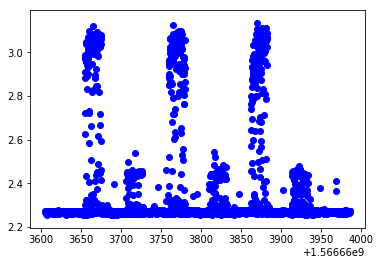

In [55]:

#graph all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


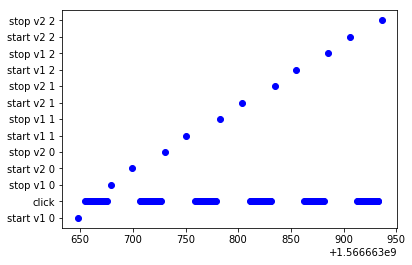

In [56]:
# a graph of volume of project start dates by year
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

voltage_2019-08-24-1566673203.png


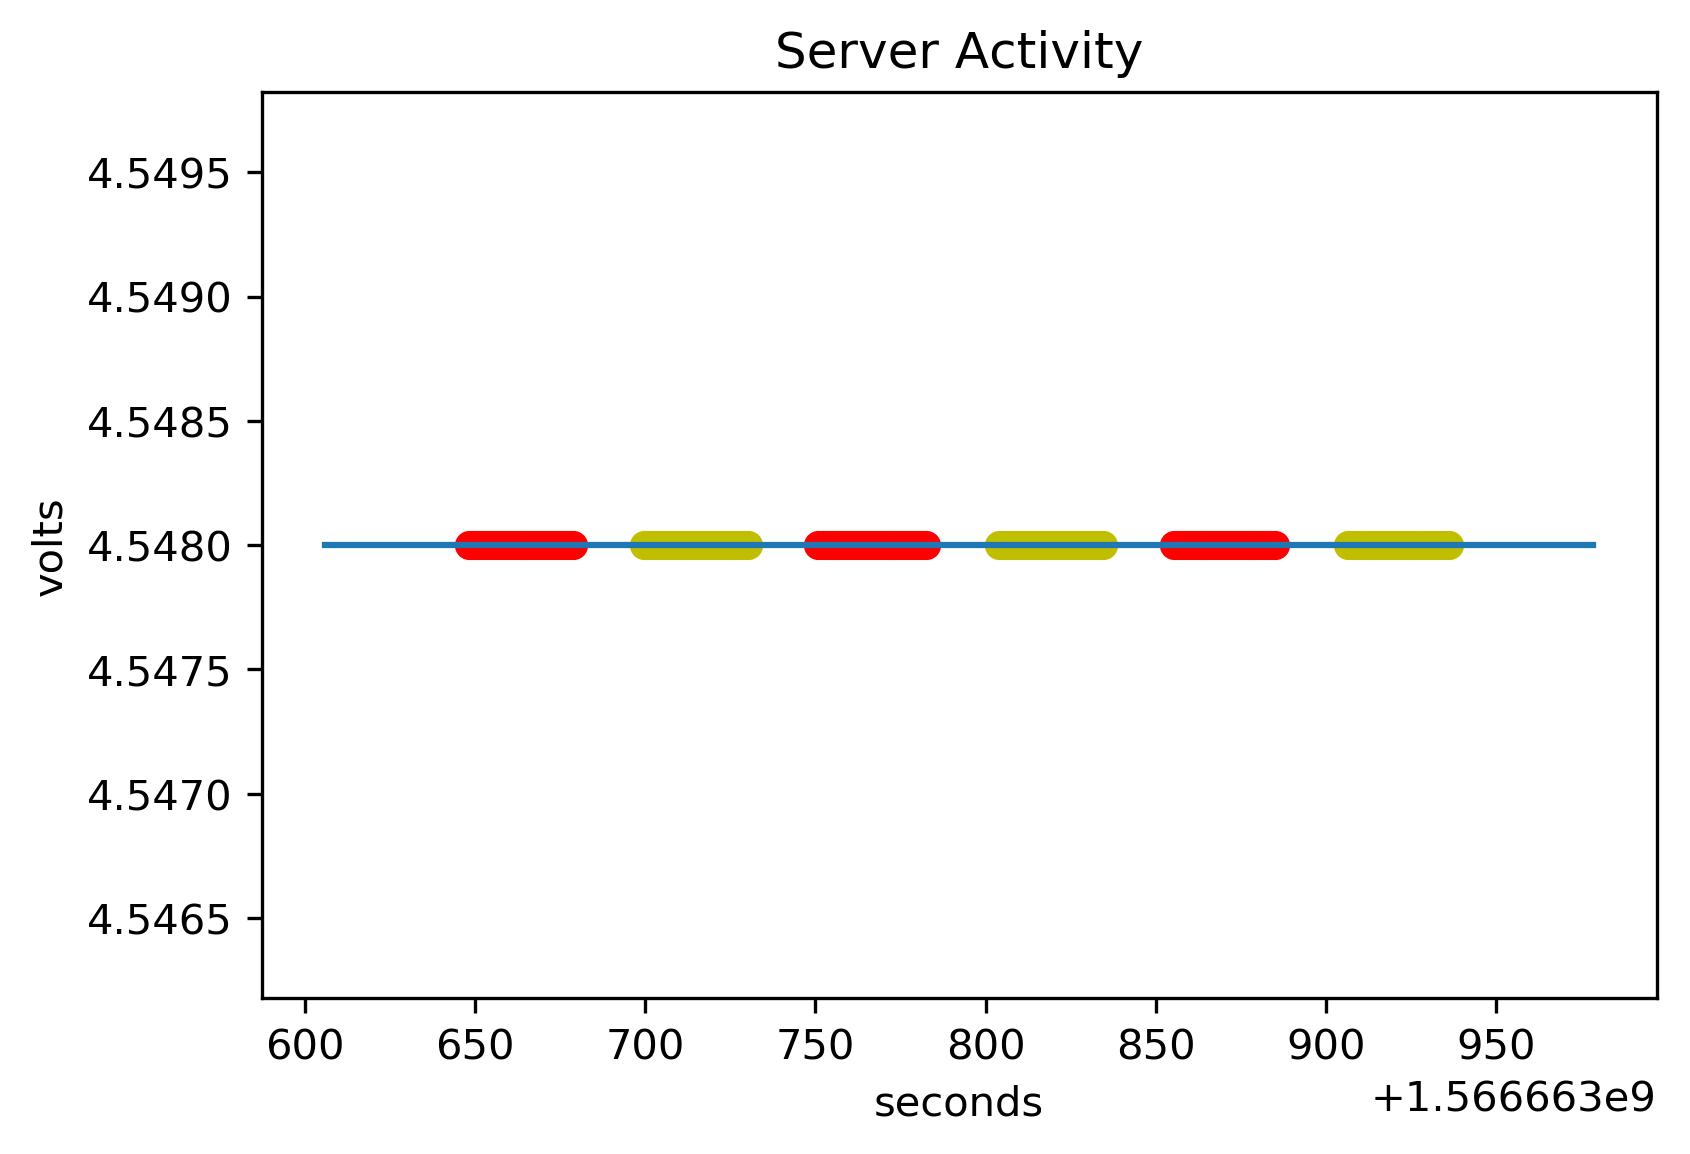

In [151]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'V']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='volts',
       title='Server Activity')

colors = ['r','y']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'V'], color=colors[plotNum%2])

#ax.grid()
pngName1 = "voltage_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

current_2019-08-24-1566673246.png


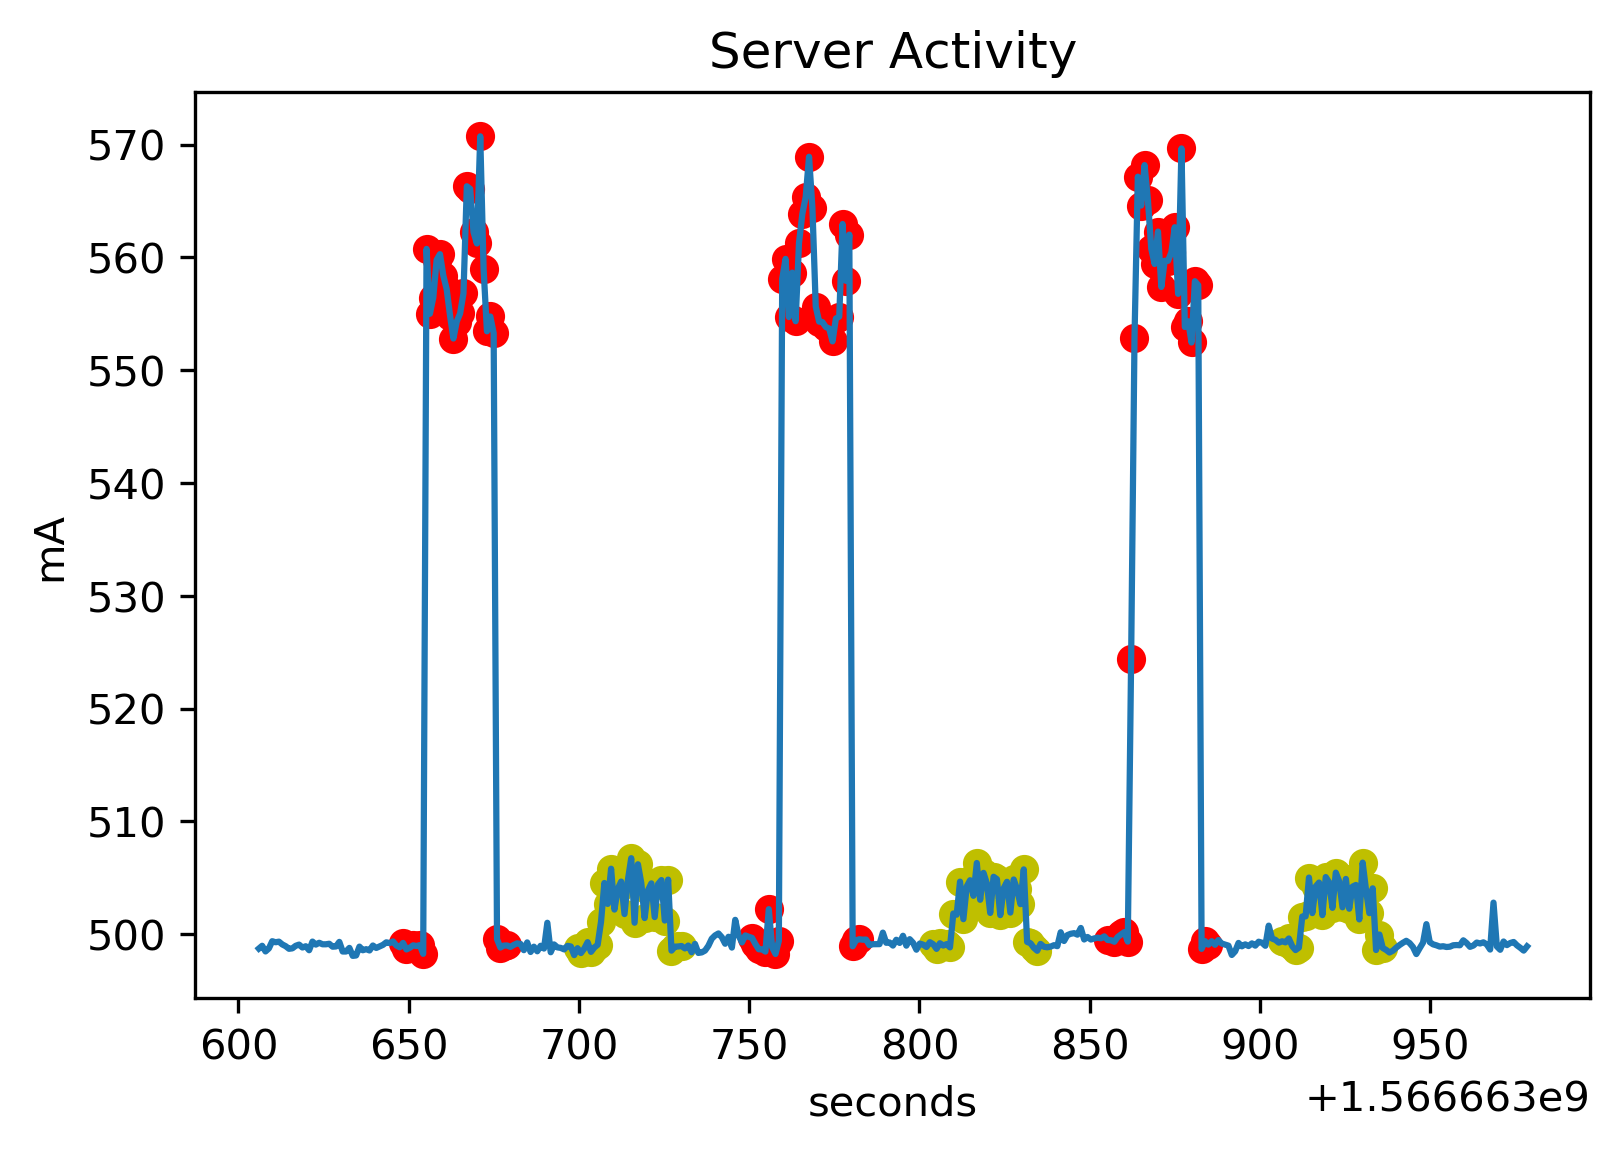

In [153]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'mA']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='mA',
       title='Server Activity')

colors = ['r','y']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'mA'], color=colors[plotNum%2])

#ax.grid()
pngName1 = "current_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

aggregatoroutput_2019-08-24-1566667912.png


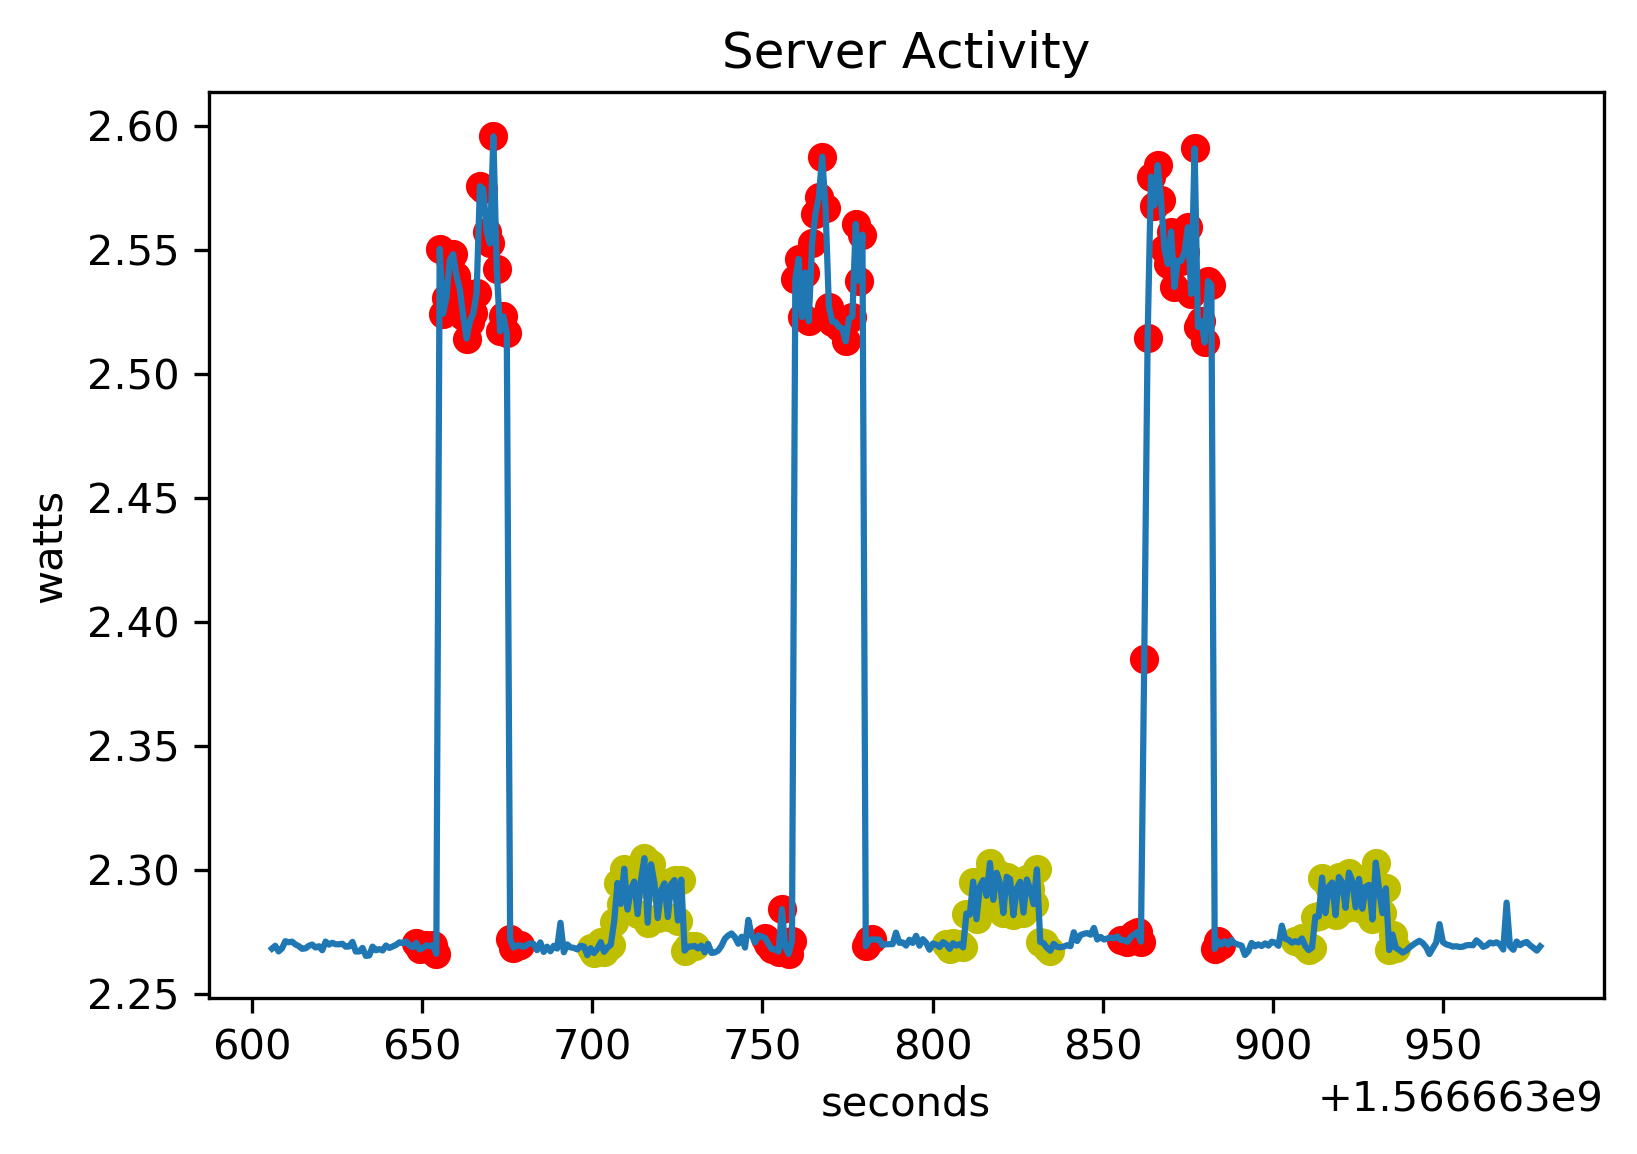

In [57]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='watts',
       title='Server Activity')

colors = ['r','y']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'watts'], color=colors[plotNum%2])

#ax.grid()
pngName1 = "watts_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

In [58]:
overlayData = dataFrameSplits
#overlayData[3]

In [59]:
for overlays in list(range(len(dataFrameSplits))):
    overlayData[overlays].insert(4, 'scaled', overlayData[overlays].time - overLayData[overlays].time[overlayData[overlays].time.index[0]], True)


aggregator_overlay-2019-08-24-1566667915.png


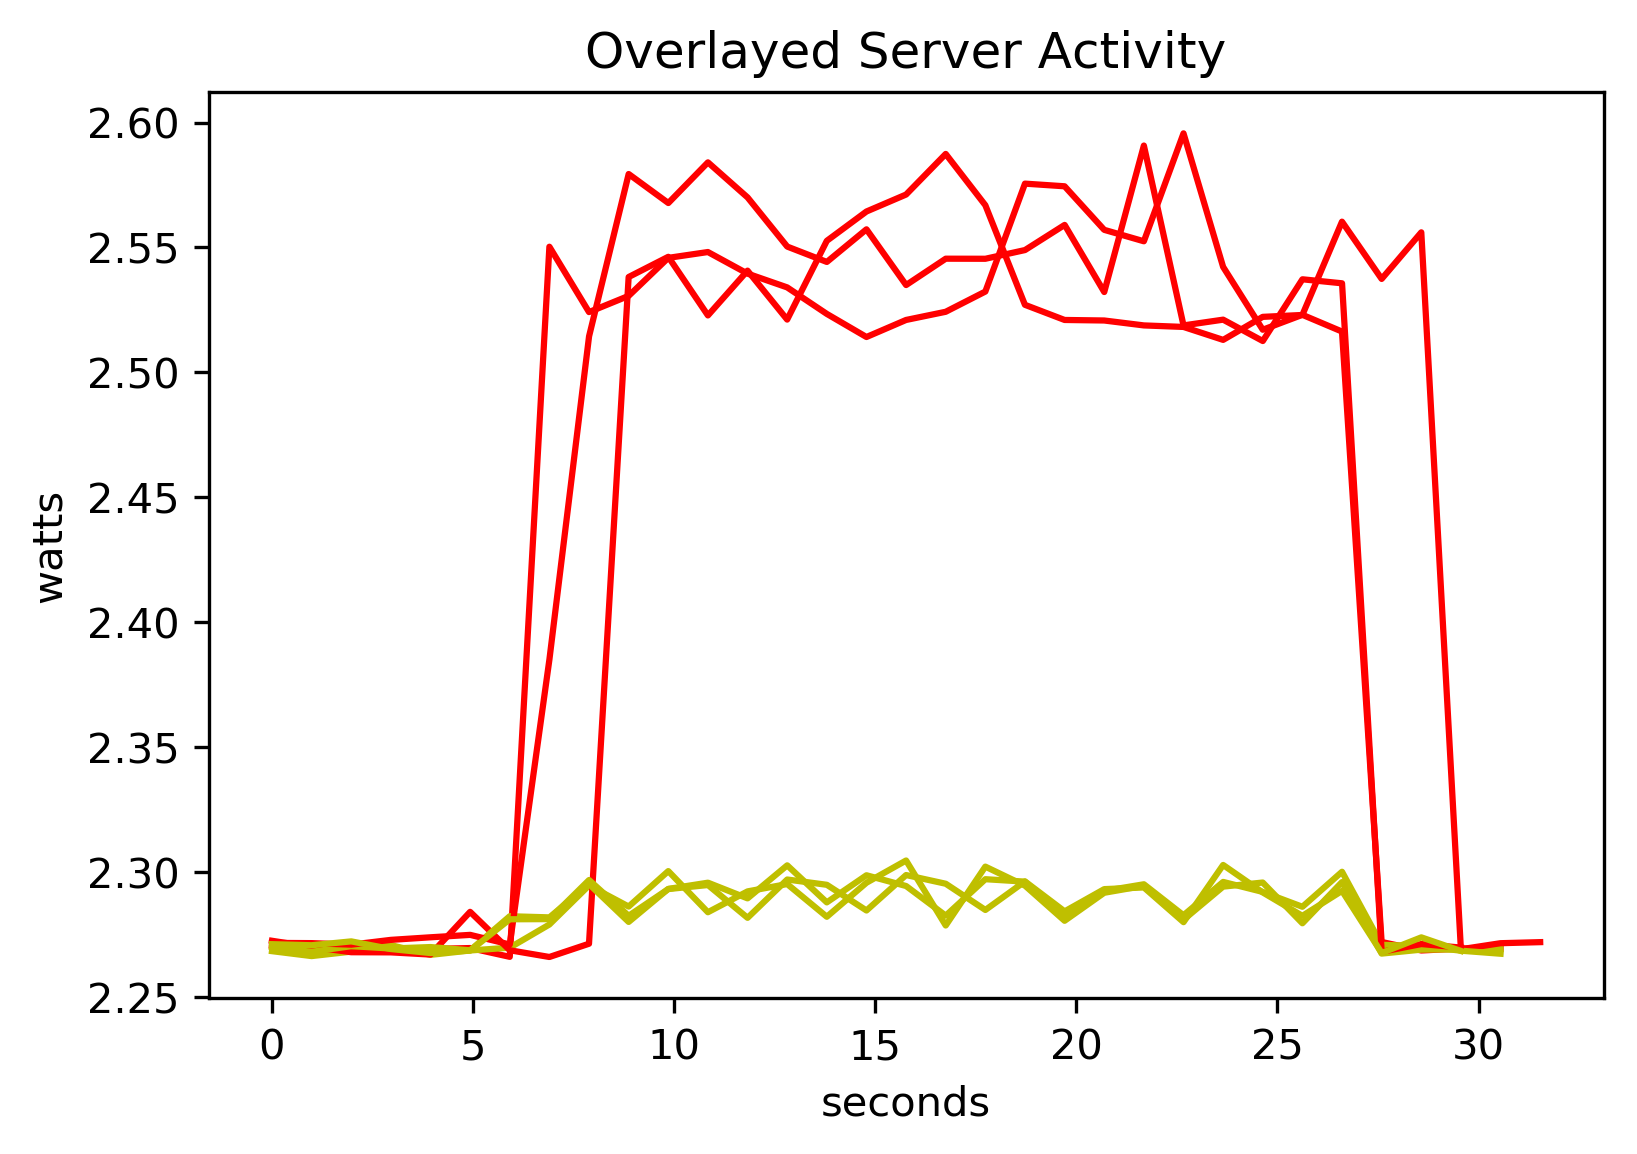

In [60]:
fig, ax = plt.subplots(dpi=300)
'''
x = overlayD1.loc[:,'scaled']
y = overlayD1.loc[:,'watts']
ax.plot(x,y, color='r')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

'''

colors = ['r','y']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
#ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

#plt.legend()
#ax.grid()
pngName2 = "aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()

In [61]:
#averages
averagedData = overlayData

In [64]:
averagedData[0].shape[0]

32

In [67]:
#find the shortest length of the data sets
dataLengths = []

for mins in list(range(len(overlayData))):
    dataLengths.append(averagedData[mins].shape[0])
minData = min(dataLengths)

minData

31

In [93]:
averagedData[4].watts.loc[averagedData[4].index[6]]

2.2709680000000008

In [138]:
newAveragedDataL = []
newAveragedDataS = []

#loop through all data points
for sumum in list(range(minData)):
    #add up that data point for each set
    summedUp = []
    for getVal in list(range(len(averagedData)/2)):
        summedUp.append(averagedData[getVal*2].watts.loc[averagedData[getVal*2].index[sumum]])
    newAveragedDataL.append(np.mean(summedUp))
    
    summedUp = []
    for getVal in list(range(len(averagedData)/2)):
        summedUp.append(averagedData[(getVal*2)+1].watts.loc[averagedData[(getVal*2)+1].index[sumum]])
    newAveragedDataS.append(np.mean(summedUp))
    
print(newAveragedDataL)
print(newAveragedDataS)
    

[2.271493546666667, 2.269765306666667, 2.269088160000001, 2.270028080000001, 2.269987653333334, 2.2761325066666673, 2.2685525066666674, 2.4004647200000004, 2.4366162666666678, 2.5494066666666675, 2.5533078400000004, 2.551690773333334, 2.550104026666667, 2.5351764800000005, 2.540098426666667, 2.545283146666667, 2.5423825333333343, 2.552408346666667, 2.5482545066666664, 2.550528506666667, 2.5515088533333334, 2.536672266666667, 2.5540355200000007, 2.544232053333334, 2.5254538666666666, 2.5172876800000004, 2.527768293333334, 2.5374504800000004, 2.3591385600000003, 2.3652632000000007, 2.269381253333334]
[2.269765306666667, 2.268340266666667, 2.270210000000001, 2.269745093333334, 2.2680977066666674, 2.2685828266666674, 2.277678826666667, 2.28064008, 2.2954968800000004, 2.2828736533333336, 2.295577733333334, 2.2914542133333335, 2.2877652800000003, 2.298266106666667, 2.288250400000001, 2.2929803200000003, 2.2992464533333337, 2.2854609600000004, 2.29467824, 2.2956282666666668, 2.282105546666667

In [143]:
# make a new data frame


someAveragedData = {'large' : newAveragedDataL ,'small' : newAveragedDataS , 'time': averagedData[4].loc[:,'scaled']}

averagedDF = pd.DataFrame(someAveragedData)


#get subsection
averagedDF = averagedDF.loc[(averagedDF.loc[:,'time']>= 10)  & (averagedDF.loc[:,'time'] <= 25)]

print(np.mean(averagedDF.large))
print(np.mean(averagedDF.small))

# Declare a list that is to be converted into a column 

averagedDF = averagedDF.assign(largeAVG=np.mean(averagedDF.large))
averagedDF = averagedDF.assign(smallAVG=np.mean(averagedDF.small))


averagedDF

2.5430077991111113
2.2916448924444452


,large,small,time,largeAVG,smallAVG
264,2.551691,2.291454,10.839499,2.543008,2.291645
265,2.550104,2.287765,11.824861,2.543008,2.291645
266,2.535176,2.298266,12.810876,2.543008,2.291645
267,2.540098,2.288250,13.796215,2.543008,2.291645
268,2.545283,2.292980,14.781343,2.543008,2.291645
269,2.542383,2.299246,15.766925,2.543008,2.291645
270,2.552408,2.285461,16.752521,2.543008,2.291645
271,2.548255,2.294678,17.737451,2.543008,2.291645
272,2.550529,2.295628,18.722794,2.543008,2.291645
273,2.551509,2.282106,19.708859,2.543008,2.291645


aggregator_averaged-2019-08-24-1566672645.png


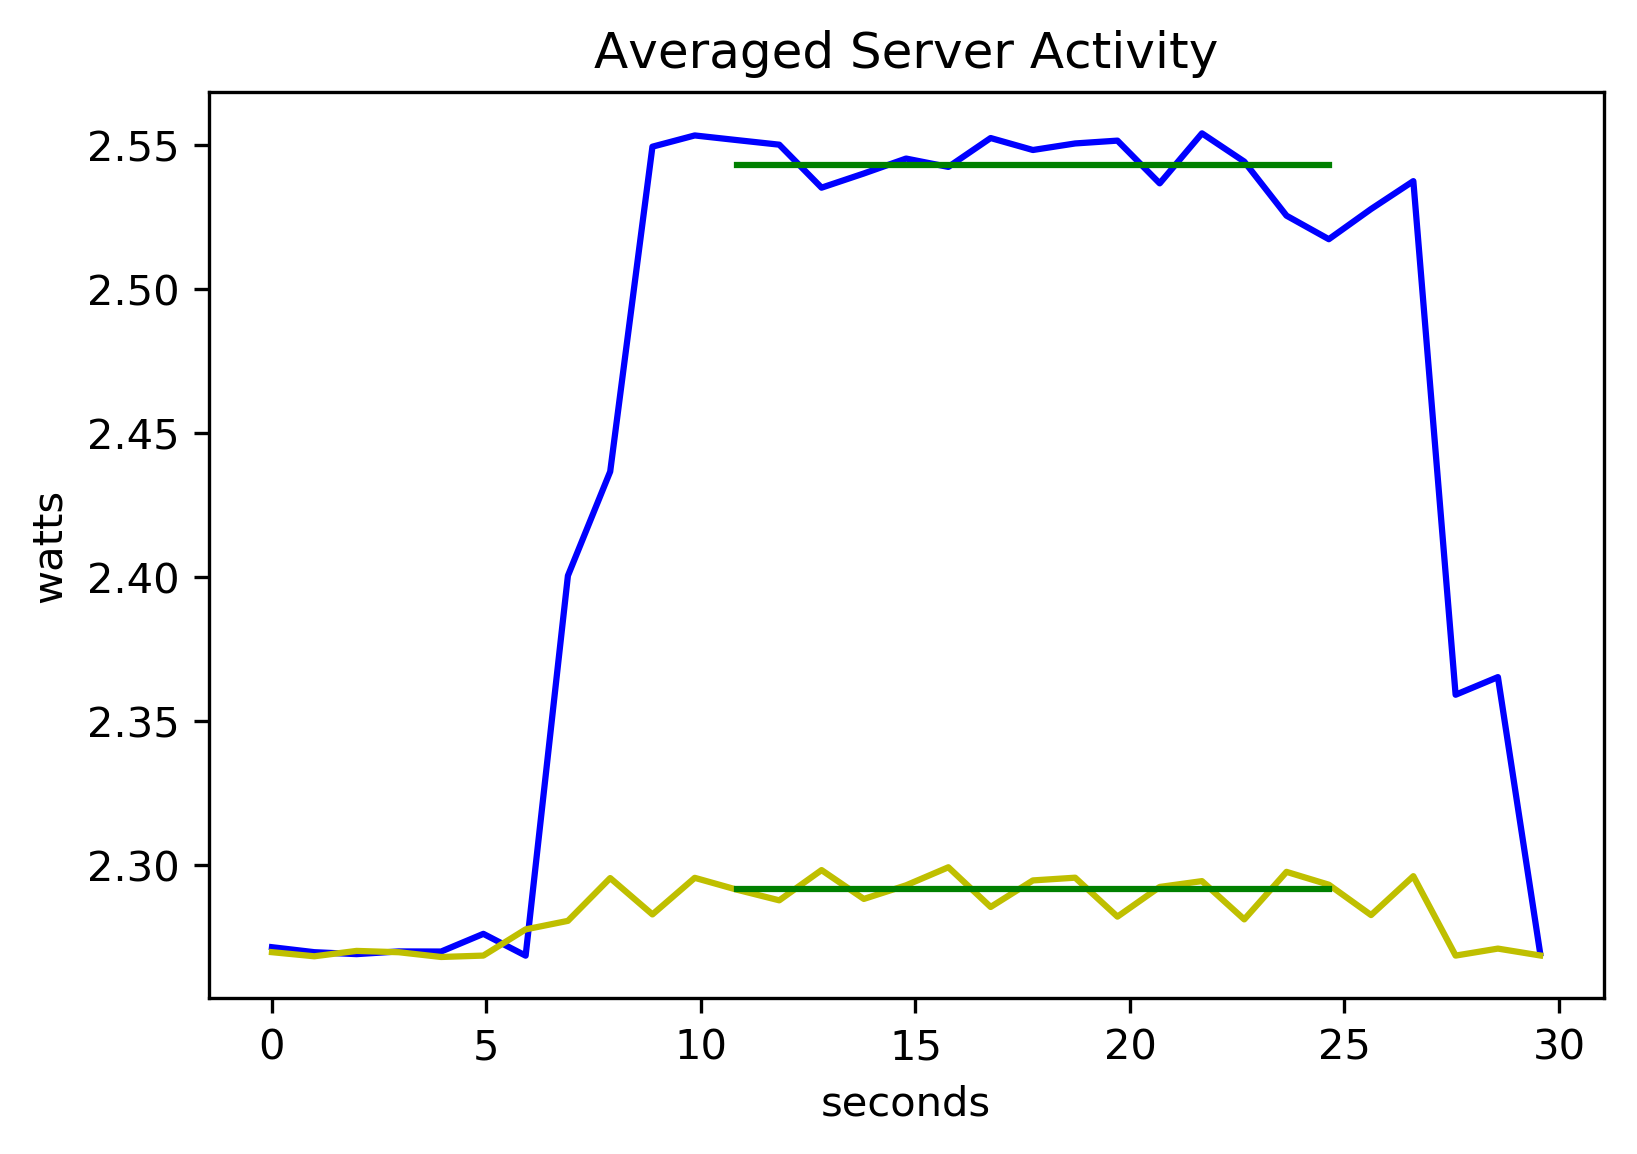

In [147]:
fig, ax = plt.subplots(dpi=300)


plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='y')

plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'smallAVG'], color='g')
plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'largeAVG'], color='g')

ax.set(xlabel='seconds', ylabel='watts',
       title='Averaged Server Activity')

#plt.legend()
#ax.grid()
pngName3 = "aggregator_averaged-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName3)
fig.savefig(pngName3)
plt.show()


aggregator_overlay-2019-08-24-1566672671.png


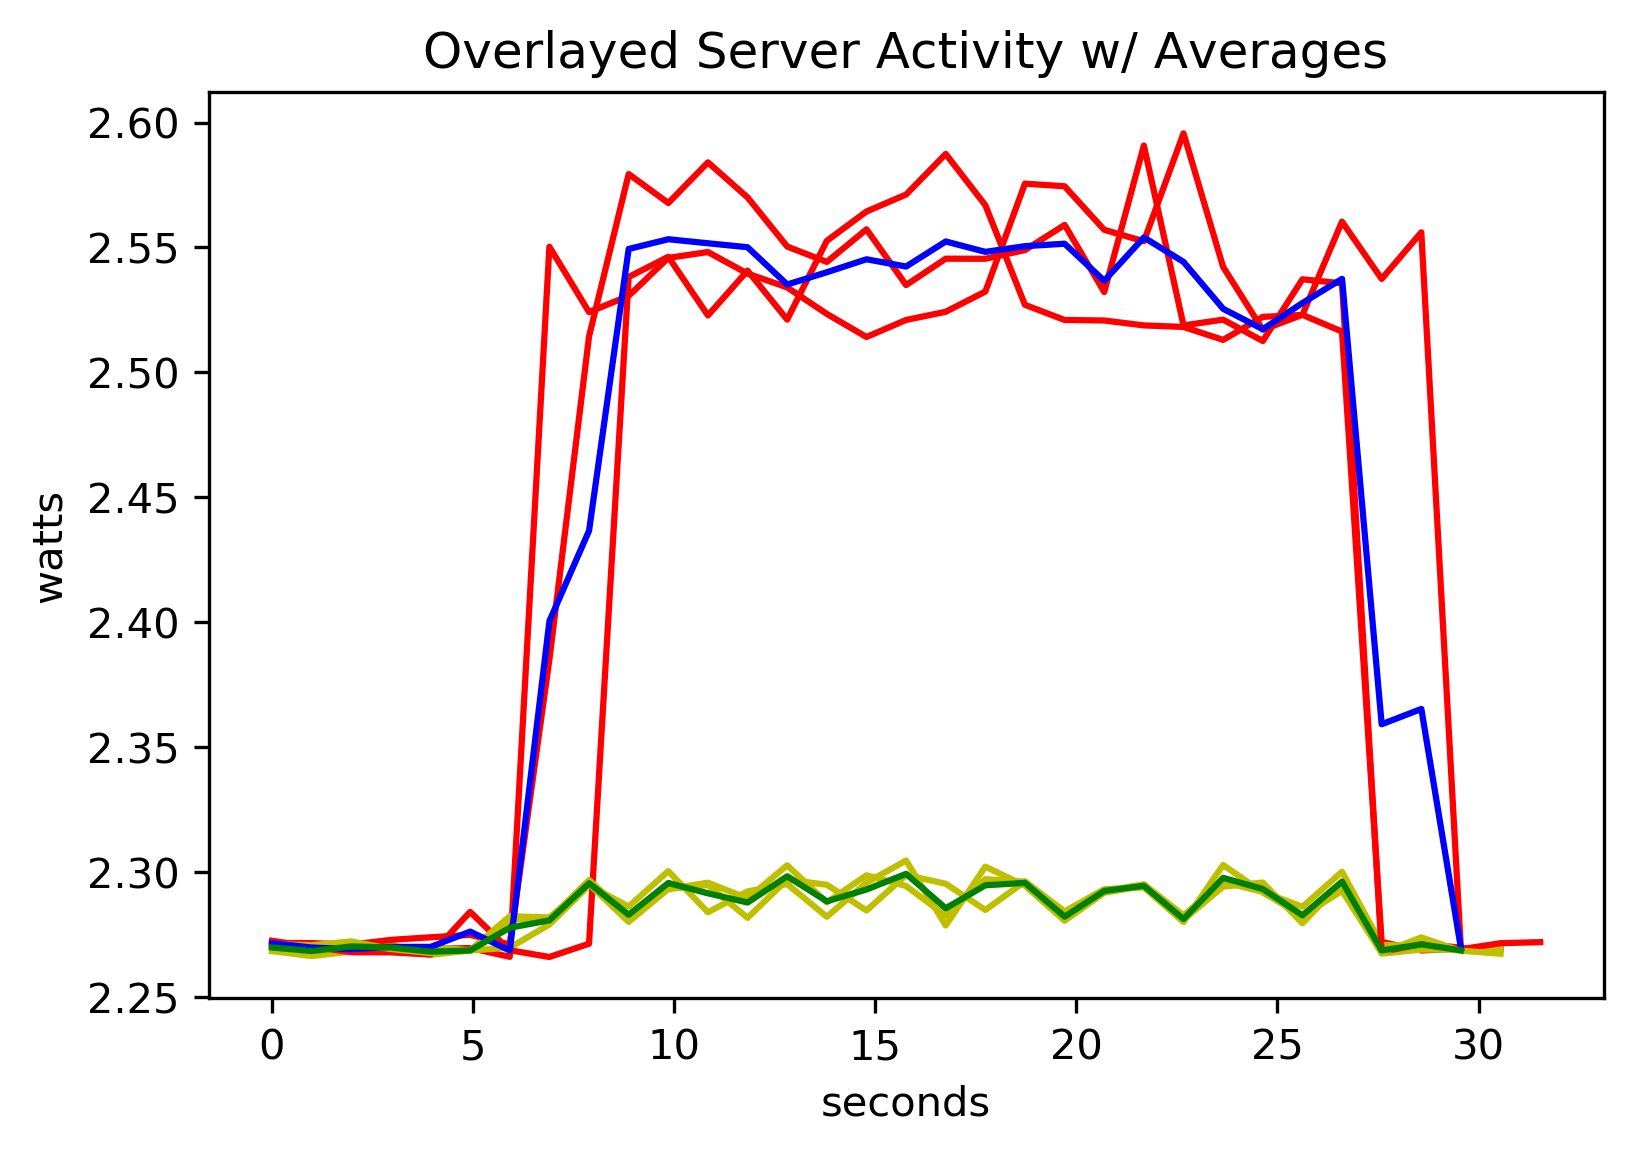

In [148]:
fig, ax = plt.subplots(dpi=300)

colors = ['r','y']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

    
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='g')

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity w/ Averages')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
#ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

#plt.legend()
#ax.grid()
pngName2 = "aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()